# 誤差逆伝播法

[バックプロパゲーション,Backpropagation](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%83%E3%82%AF%E3%83%97%E3%83%AD%E3%83%91%E3%82%B2%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3)のこと。ニューロン単位で損失関数計算し「局所誤差」を求め、ニューロンに対する入力の内、より大きな重みで接続された前段のニューロンに対して、局所誤差の責任があると判定する。連鎖律により、層全体のニューロンに対する入力を集積させてその入力を呼び起こしたニューロンを特定し、重みの傾斜を再計算することで責任を逆伝播させる。

## 連鎖律

[連鎖律](https://ja.wikipedia.org/wiki/%E9%80%A3%E9%8E%96%E5%BE%8B)とは微分法において以下の性質が成り立つ式のこと。  合成関数の導関数の積が元の構成関数の導関数と等しくなる。 。
$ \frac{dz}{dx} = \frac{dz}{dt} \frac{dt}{dx} $

## 計算グラフに置ける誤差逆伝播

[誤差逆伝播法のための計算グラフまとめ](http://marumaru.tonkotsu.jp/%E8%AA%A4%E5%B7%AE%E9%80%86%E4%BC%9D%E6%92%AD%E6%B3%95%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E8%A8%88%E7%AE%97%E3%82%B0%E3%83%A9%E3%83%95%E3%81%BE%E3%81%A8%E3%82%81) より

### ドット積の逆伝播

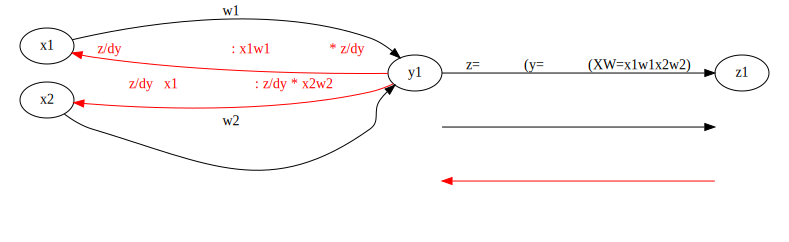

In [145]:
from graphviz import Digraph
dot = Digraph(comment="積の逆伝播")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ドット積の逆伝播（単純に転置行列をしかるべき方向から掛け合わせる）")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","x1")
        x.node("x2","x2")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y0","y0", color="white", fontcolor="white")
        y.node("y1","y1")
        y.node("y2","y2", color="white", fontcolor="white")
    dot.edge("x1", "y1", label="w1")
    dot.edge("x2",  "y1", label="w2")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z0","z0", color="white", fontcolor="white")
        z.node("z1","z1")
        z.node("z2","z2", color="white", fontcolor="white")
    main.edge("y0",  "z0", label="順伝播方向")
    main.edge("z2",  "y2", label="逆伝播方向", color="red", fontcolor="red")
    main.edge("y1",  "z1", label="z=活性関数(y=ドット積(XW=x1w1x2w2)")
    main.edge("y1",  "x1", label="z/dyにｘ２の重みを与える: x1w1の転置行列 * z/dy", color="red", fontcolor="red")
    main.edge("y1",  "x2", label="z/dyにx1の重みを与える: z/dy * x2w2の転置行列", color="red", fontcolor="red")

#print(dot)
dot